In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
cd drive/My Drive/100

/content/drive/.shortcut-targets-by-id/1Q0LGaFnY9M_-J4IgkyoUo9wSz6QEgRDr/100


## Import data preprocessing libraries

In [3]:
import pandas as pd
import os
import numpy as np

## Read the data and process. And convert string to int

In [4]:
X = []
optimized_values = []

# Read every file one by one
for file in os.listdir("DS"):
    # Read a file
    df = pd.read_csv(os.path.join("DS", file))

    # Convert optmizied value to int and add it to the array
    optimized_values.append(float(df.columns[0].split(':')[1]))

    # Go through every row of csv file and convert all values to int
    data = []
    for row_number, row in enumerate(df.iterrows()):

        # Every waiting time is expressed in 3 rows so 3 row data will consititute to 1 row in processed data
        if(row_number%3 == 0):
            data_row = []

        # Remove '[, ], "" ' from the string
        tokens = (row[1][0]).split(' ')
        for token in tokens:
            start = 0
            end = len(token)
            if(token == ''):
                continue
            elif(token[:2] == "[["):
                start += 2
            elif(token[:1] == "["):
                start += 1
            elif(token[-2:] == "]]"):
                end -= 2
            elif(token[-1:] == "]"):
                end -= 1
            if(end == start):
                continue
            data_row.append(int(token[start:end]))
        if(row_number%3 == 2):
            data.append(data_row)
    X.append(np.array(data))

# Convert X to numpy array
X = np.array(X)
print(X.shape)
print(len(optimized_values))

(1000, 50, 50)
1000


In [5]:
X_copy = X
optimized_values_copy = optimized_values

# ANN

## Divide the data into training and testing

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_copy, optimized_values_copy, test_size=0.1, random_state=42)

In [7]:
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

(900, 50, 50)
900
(100, 50, 50)
100


## Reshape them to convert to a 1-D array from 2-D array

In [8]:
X_train = X_train.reshape((900, -1))
X_test = X_test.reshape((100, -1))
print(X_train.shape)
print(X_test.shape)

(900, 2500)
(100, 2500)


## Apply the standardization


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Import the machine learning library

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dropout
import tensorflow as tf

## Make the ANN

In [11]:
model = Sequential()
model.add(Dense(128, input_shape=(2500,), activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(1, activation="linear"))

## Compile the model and print the summary

In [12]:
INIT_LR = 0.01
EPOCHS = 360
opt = Adam(lr=INIT_LR)
model.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               320128    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 324,289
Trainable params: 324,289
Non-trainable params: 0
_________________________________________________________________


## Fit the model (training)

In [13]:
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data = (X_test, y_test))  

Epoch 1/360
29/29 [==============================] - 0s 7ms/step - loss: 3004241.0000 - root_mean_squared_error: 1733.2747 - val_loss: 2949383.7500 - val_root_mean_squared_error: 1717.3770
Epoch 2/360
29/29 [==============================] - 0s 3ms/step - loss: 3001015.2500 - root_mean_squared_error: 1732.3439 - val_loss: 2945675.7500 - val_root_mean_squared_error: 1716.2971
Epoch 3/360
29/29 [==============================] - 0s 3ms/step - loss: 2987272.0000 - root_mean_squared_error: 1728.3727 - val_loss: 2935200.2500 - val_root_mean_squared_error: 1713.2426
Epoch 4/360
29/29 [==============================] - 0s 3ms/step - loss: 2969223.5000 - root_mean_squared_error: 1723.1436 - val_loss: 2923576.0000 - val_root_mean_squared_error: 1709.8468
Epoch 5/360
29/29 [==============================] - 0s 3ms/step - loss: 2945359.0000 - root_mean_squared_error: 1716.2048 - val_loss: 2890098.2500 - val_root_mean_squared_error: 1700.0289
Epoch 6/360
29/29 [==============================] - 0s

## Save the model

In [14]:
import h5py
model.save('1104370-ANN.h5')

In [17]:
from tensorflow.keras.models import load_model
ann_model = load_model('1104370-ANN.h5')

## Plot the results

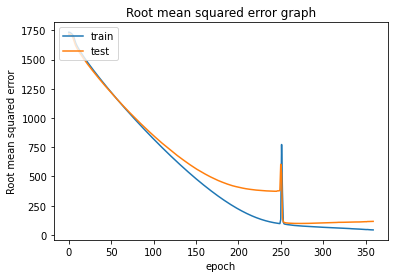

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Root mean squared error graph')
plt.ylabel('Root mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

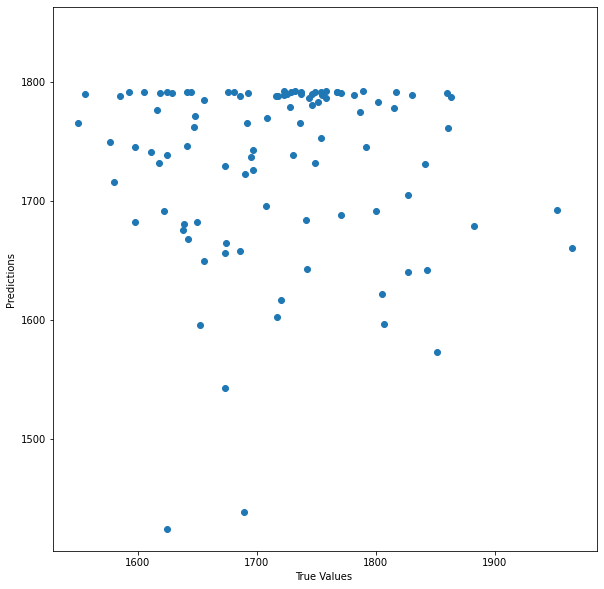

In [19]:
pred = model.predict(X_test)
plt.figure(figsize=(10, 10))
plt.scatter(y_test, pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
plt.show()

# CNN

In [20]:
import numpy as np

In [21]:
X_copy = X
optimized_values_copy = optimized_values

## Divide the data into train and test

In [22]:
from sklearn.model_selection import train_test_split
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_copy, optimized_values_copy, test_size=0.1, random_state=42)

In [23]:
y_train_cnn =  np.array(y_train_cnn)
y_test_cnn = np.array(y_test_cnn)

## Reshape the data from 2-D to 1-D so that we can apply standardScaler in the next step

In [24]:
X_train_cnn = X_train_cnn.reshape((900, -1))
X_test_cnn = X_test_cnn.reshape((100, -1))
print(X_train_cnn.shape)
print(X_test_cnn.shape)

(900, 2500)
(100, 2500)


## Apply the standardization

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_cnn)
X_train_cnn = scaler.transform(X_train_cnn)
X_test_cnn = scaler.transform(X_test_cnn)

## Reshape the data from 1-D to 3-D to be fed to convolutional neural network

In [26]:
X_train_cnn = X_train_cnn.reshape((900, 50, 50, 1))
X_test_cnn = X_test_cnn.reshape((100, 50, 50, 1))
print(X_train_cnn.shape)
print(X_test_cnn.shape)

(900, 50, 50, 1)
(100, 50, 50, 1)


## Import the machine learning libraries

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf

## Make the model architecture

In [28]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), padding="same", input_shape=(50, 50, 1)))
cnn_model.add(Activation("tanh"))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation = 'linear'))

## Compile the model and print the summary

In [29]:
INIT_LR = 0.01
EPOCHS = 50
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
cnn_model.compile(loss="MSE", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 50, 50, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 80001     
Total params: 80,321
Trainable params: 80,321
Non-trainable params: 0
_________________________________________________________________


## Fit the model

In [30]:
history = cnn_model.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=EPOCHS, verbose=1)

Epoch 1/50
29/29 [==============================] - 0s 8ms/step - loss: 1418529.0000 - root_mean_squared_error: 1191.0201 - val_loss: 58838.7539 - val_root_mean_squared_error: 242.5670
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 41381.0273 - root_mean_squared_error: 203.4233 - val_loss: 7568.8506 - val_root_mean_squared_error: 86.9991
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: 8898.4189 - root_mean_squared_error: 94.3314 - val_loss: 6905.2783 - val_root_mean_squared_error: 83.0980
Epoch 4/50
29/29 [==============================] - 0s 4ms/step - loss: 6544.3662 - root_mean_squared_error: 80.8973 - val_loss: 6420.4814 - val_root_mean_squared_error: 80.1279
Epoch 5/50
29/29 [==============================] - 0s 5ms/step - loss: 5890.9346 - root_mean_squared_error: 76.7524 - val_loss: 6575.7983 - val_root_mean_squared_error: 81.0913
Epoch 6/50
29/29 [==============================] - 0s 5ms/step - loss: 5398.3330 - root_mean_squared

## Save the model

In [60]:
import h5py
cnn_model.save('1104370-CNN.h5')

In [63]:
from tensorflow.keras.models import load_model
cnn_model = load_model('1104370-CNN.h5')

## Plot the results

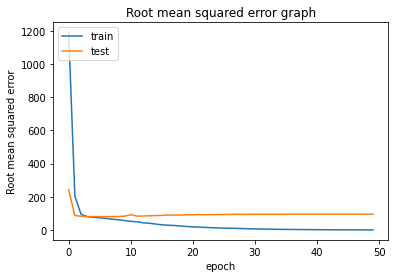

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Root mean squared error graph')
plt.ylabel('Root mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

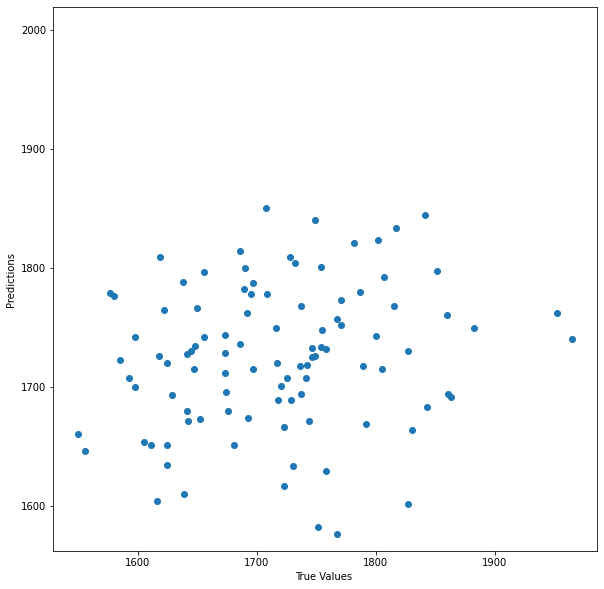

In [41]:
pred = cnn_model.predict(X_test_cnn)
plt.figure(figsize=(10, 10))
plt.scatter(y_test, pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
plt.show()

# Compare the results of different models

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

cnn_output = cnn_model.predict(X_test_cnn)
ann_output = model.predict(X_test)
cnn_rms = sqrt(mean_squared_error(y_test, cnn_output))
ann_rms = sqrt(mean_squared_error(y_test, ann_output))

    CNN RMSE    ANN RMSE
0  95.309731  115.707946


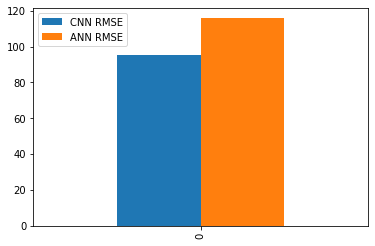

In [43]:
import pandas as pd
df = pd.DataFrame({"CNN RMSE":[cnn_rms], "ANN RMSE":[ann_rms]})
print(df)
df.plot(kind='bar')